# Similarity

manhattan_distance:  $$d(x,y)=\sum^n_{i=1}|(x_i - y_i)|$$
Euclidean :  $$d(x,y)=\sqrt{\sum^n_{i=1}(x_i - y_i)^2}$$
Cosine:  $$\theta(x,y)=\frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}}$$

Q: x1 -> y1, x2 -> y2 哪個較不相關?
- x1 = [0,5] -> y1 = [1,5]
- x2 = [0,5] -> y2 = [100,5]

In [1]:
import numpy as np

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))
    
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [2]:
X1 = np.array([0,5])
Y1 = np.array([1,5])

print('x=[0,5],y=[1,5]')
print("歐式距離(x1,y1)=",euclidean_distance(X1,Y1))
print("cos距離(x1,y1)=",cosine_similarity(X1,Y1))
print('\nx=[100,5],y=[1,5]')

X2 = np.array([0,5])
Y2 = np.array([0,100])
print("歐式距離(x2,y2)=",euclidean_distance(X2,Y2))
print("cos距離(x2,y2)=",cosine_similarity(X2,Y2))
print()
print("cos值越大 角度越小 表示很有相關")
print("cos值越小 角度越大 表示越不相關 ")

x=[0,5],y=[1,5]
歐式距離(x1,y1)= 1.0
cos距離(x1,y1)= 0.9805806756909201

x=[100,5],y=[1,5]
歐式距離(x2,y2)= 95.0
cos距離(x2,y2)= 1.0

cos值越大 角度越小 表示很有相關
cos值越小 角度越大 表示越不相關 


# Euclidean Distance or Cosine Similarity?

- 歐式距離：適用於計算絕對距離或空間距離的場景，如地理位置計算、影像處理、聚類分析和推薦系統中的物品特徵匹配。
- 餘弦相似度：適用於衡量方向相似性的場景，特別是在文字分析、推薦系統、社交網路分析和特徵選擇中，用於處理高維度稀疏資料。

選擇哪種距離度量取決於具體應用場景和資料的特性。例如，對於高維稀疏資料(如文字資料)，餘弦相似度通常較為合適，而對於物理空間中的距離計算，歐式距離較為直觀。

x=[0,5], y=[1,5]
Euclidean Distance (X1, Y1) = 1.0
Cosine Similarity (X1, Y1) = 0.9805806756909202

x=[0,5], y=[0,100]
Euclidean Distance (X2, Y2) = 95.0
Cosine Similarity (X2, Y2) = 1.0

Cosine similarity closer to 1 indicates higher similarity (smaller angle).
Cosine similarity closer to 0 indicates lower similarity (larger angle).


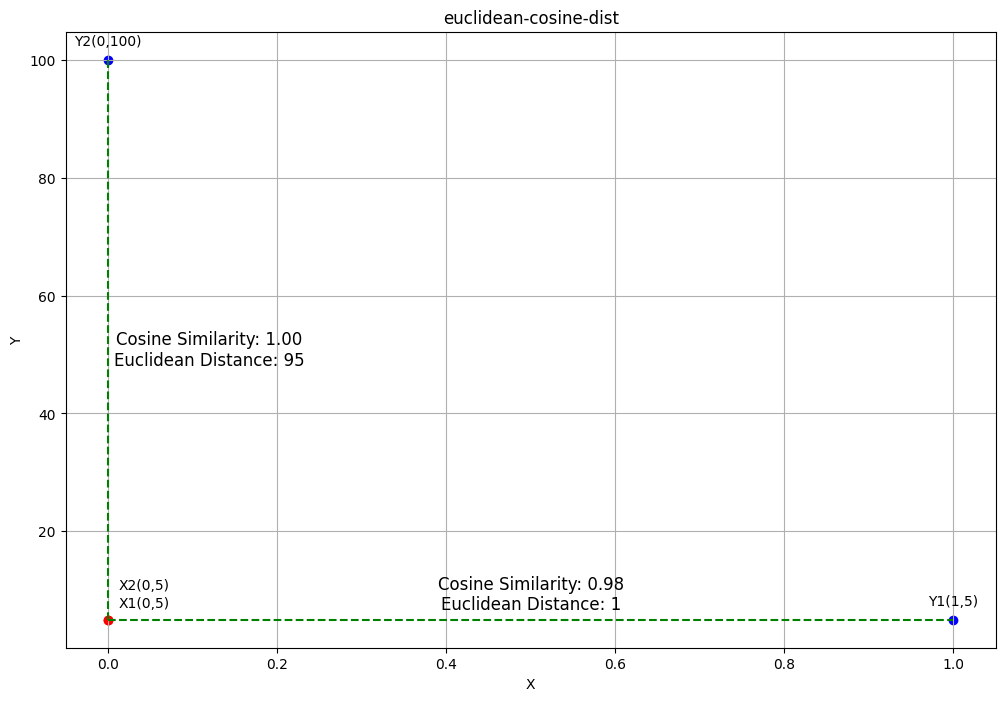

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

# 定義向量
X1 = np.array([0, 5])
Y1 = np.array([1, 5])

X2 = np.array([0, 5])
Y2 = np.array([0, 100])

# 計算歐式距離和余弦相似度
euclidean_dist_X1_Y1 = euclidean_distances([X1], [Y1])[0][0]
cosine_similarity_X1_Y1 = cosine_similarity([X1], [Y1])[0][0]

euclidean_dist_X2_Y2 = euclidean_distances([X2], [Y2])[0][0]
cosine_similarity_X2_Y2 = cosine_similarity([X2], [Y2])[0][0]

# 打印計算結果
print(f"x=[0,5], y=[1,5]")
print(f"Euclidean Distance (X1, Y1) = {euclidean_dist_X1_Y1}")
print(f"Cosine Similarity (X1, Y1) = {cosine_similarity_X1_Y1}")

print(f"\nx=[0,5], y=[0,100]")
print(f"Euclidean Distance (X2, Y2) = {euclidean_dist_X2_Y2}")
print(f"Cosine Similarity (X2, Y2) = {cosine_similarity_X2_Y2}")

print("\nCosine similarity closer to 1 indicates higher similarity (smaller angle).")
print("Cosine similarity closer to 0 indicates lower similarity (larger angle).")

# 定義畫圖函數
def plot_vectors(X1, Y1, X2, Y2, euclidean_dist_X1_Y1, cosine_similarity_X1_Y1, euclidean_dist_X2_Y2, cosine_similarity_X2_Y2):
    plt.figure(figsize=(12, 8))

    # 畫第一組向量
    plt.scatter(*X1, color='red')
    plt.scatter(*Y1, color='blue')
    plt.plot([X1[0], Y1[0]], [X1[1], Y1[1]], 'g--')
    plt.annotate(f'X1({X1[0]},{X1[1]})', xy=X1, textcoords='offset points', xytext=(26,9), ha='center')
    plt.annotate(f'Y1({Y1[0]},{Y1[1]})', xy=Y1, textcoords='offset points', xytext=(0,10), ha='center')
    plt.text((X1[0] + Y1[0]) / 2, (X1[1] + Y1[1]) / 2 + 1, f'Cosine Similarity: {cosine_similarity_X1_Y1:.2f}\nEuclidean Distance: {euclidean_dist_X1_Y1:.0f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=12)

    # 畫第二組向量
    plt.scatter(*X2, color='red')
    plt.scatter(*Y2, color='blue')
    plt.plot([X2[0], Y2[0]], [X2[1], Y2[1]], 'g--')
    plt.annotate(f'X2({X2[0]},{X2[1]})', xy=X2, textcoords='offset points', xytext=(26,22), ha='center')
    plt.annotate(f'Y2({Y2[0]},{Y2[1]})', xy=Y2, textcoords='offset points', xytext=(0,10), ha='center')
    plt.text((X2[0] + Y2[0]) / 2 + 0.12, (X2[1] + Y2[1]) / 2 - 5, f'Cosine Similarity: {cosine_similarity_X2_Y2:.2f}\nEuclidean Distance: {euclidean_dist_X2_Y2:.0f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=12)

    plt.title('euclidean-cosine-dist')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    
    # 保存圖像
    plt.savefig('images/dist-euclidean-cosine.png')
    plt.show()

# 畫圖
plot_vectors(X1, Y1, X2, Y2, euclidean_dist_X1_Y1, cosine_similarity_X1_Y1, euclidean_dist_X2_Y2, cosine_similarity_X2_Y2)

# cos plt
- cos值越大 角度越小 表示很有相關
- cos值越小 角度越大 表示越不相關 

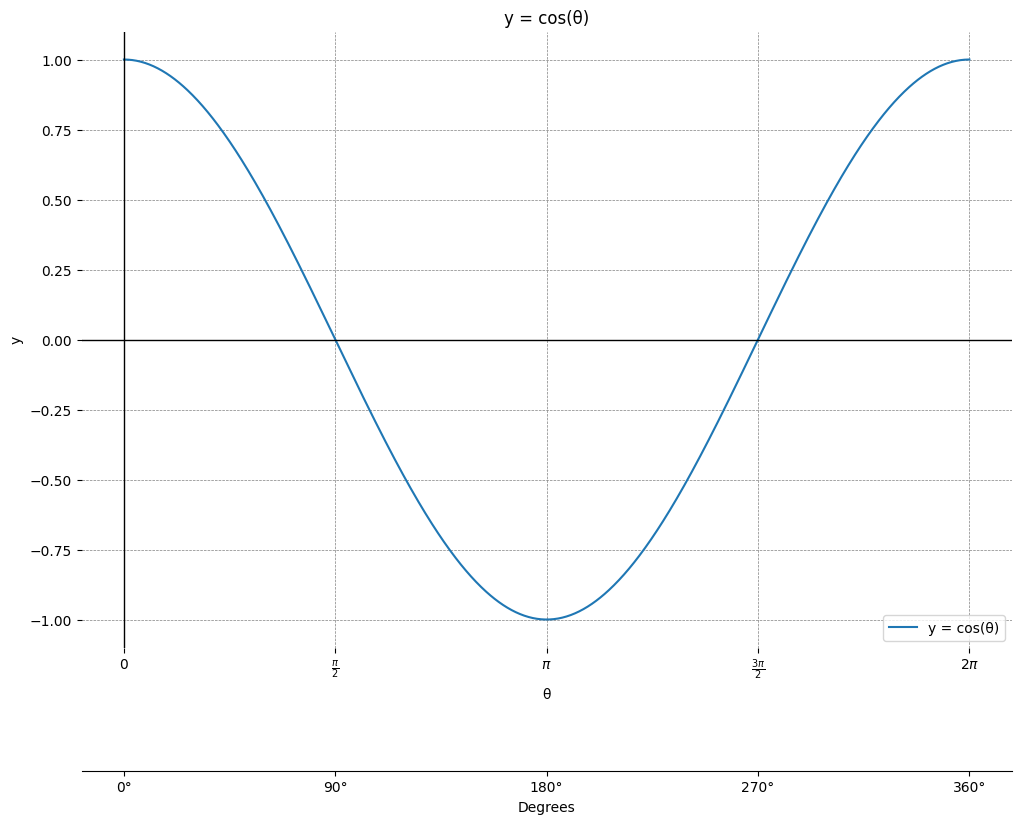

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定義θ的範圍
theta = np.linspace(0, 2 * np.pi, 1000)
# 計算y=cos(θ)
y = np.cos(theta)

# 繪製圖像
plt.figure(figsize=(12, 8))
plt.plot(theta, y, label='y = cos(θ)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 設置x軸和y軸的標籤
plt.xlabel('θ')
plt.ylabel('y')

# 設置x軸和y軸的刻度
ax = plt.gca()
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# 添加第二個x軸顯示角度
secax = ax.secondary_xaxis(-0.2)
secax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
secax.set_xticklabels(['0°', '90°', '180°', '270°', '360°'])
secax.set_xlabel('Degrees')

# 移除外框線
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 設置標題
plt.title('y = cos(θ)')

# 顯示圖例
plt.legend()

# 顯示圖像
plt.savefig('images/cosine.png')
plt.show()

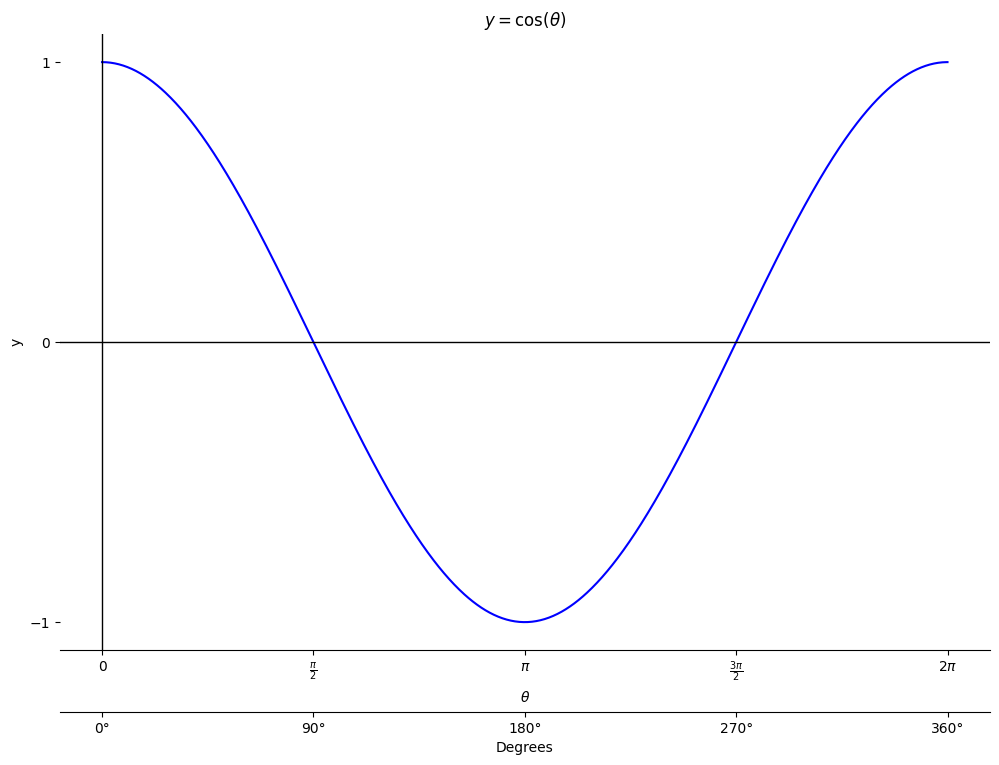

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定義θ的範圍
theta = np.linspace(0, 2 * np.pi, 1000)
# 計算y=cos(θ)
y = np.cos(theta)

# 繪製圖像
plt.figure(figsize=(12, 8))
plt.plot(theta, y, color='blue')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(False)

# 設置x軸和y軸的標籤
plt.xlabel(r'$\theta$')
plt.ylabel('y')

# 設置x軸和y軸的刻度
ax = plt.gca()
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax.set_yticks([-1, 0, 1])  # 設置y軸刻度

# 添加第二個x軸顯示角度
secax = ax.secondary_xaxis(-0.1)
secax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
secax.set_xticklabels(['0°', '90°', '180°', '270°', '360°'])
secax.set_xlabel('Degrees')

# 移除外框線，只保留X軸和Y軸
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

# # 移除所有外框線
# for spine in ax.spines.values():
#     spine.set_visible(False)

# 設置標題
plt.title(r'$y = \cos(\theta)$')

# 保存圖像
plt.savefig('images/cosine_no_grid.png')

# 顯示圖像
plt.show()

In [6]:
import numpy as np

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))
    
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("三維")

# 定義向量
A = np.array([99, 1, 1])
B = np.array([0, 1, 1])
C = np.array([100, 0, 0])

# 顯示向量
print('A={0}, B={1}, C={2}'.format(A, B, C))

# 計算並顯示歐幾里得距離
print("歐式距離(A,B)=", euclidean_distance(A, B))
print("歐式距離(A,C)=", euclidean_distance(A, C))

print("================================")

# 計算並顯示餘弦相似度
print("cos距離(A,B)=", cosine_similarity(A, B))
print("cos距離(A,C)=", cosine_similarity(A, C))

三維
A=[99  1  1], B=[0 1 1], C=[100   0   0]
歐式距離(A,B)= 99.0
歐式距離(A,C)= 1.7320508075688772
cos距離(A,B)= 0.014283528198687934
cos距離(A,C)= 0.9998979852075898


# 詞彙出現次數

假設這些向量表示文本中不同詞彙在三個不同文章中的出現次數
- A 表示 [文章1, 文章2, 文章3] 中a詞彙的出現次數
- B 表示 [文章1, 文章2, 文章3] 中b詞彙的出現次數
- C 表示 [文章1, 文章2, 文章3] 中c詞彙的出現次數

In [7]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

# 定義向量
A = np.array([99, 1, 1])
B = np.array([0, 1, 1])
C = np.array([100, 0, 0])

# 計算歐式距離和余弦相似度
euclidean_dist_AB = euclidean_distances([A], [B])[0][0]
euclidean_dist_AC = euclidean_distances([A], [C])[0][0]
cosine_similarity_AB = cosine_similarity([A], [B])[0][0]
cosine_similarity_AC = cosine_similarity([A], [C])[0][0]

print("三維")

print(f'A={A}, B={B}, C={C}')
print(f"歐式距離(A, B) = {euclidean_dist_AB}")
print(f"歐式距離(A, C) = {euclidean_dist_AC}")
print("================================")
print(f"cos距離(A, B) = {cosine_similarity_AB}")
print(f"cos距離(A, C) = {cosine_similarity_AC}")

三維
A=[99  1  1], B=[0 1 1], C=[100   0   0]
歐式距離(A, B) = 99.0
歐式距離(A, C) = 1.7320508075688772
cos距離(A, B) = 0.014283528198687936
cos距離(A, C) = 0.9998979852075898


情境解釋
1. 歐式距離
   - 歐式距離衡量的是兩個向量之間的直線距離。在文本處理中，可以用來衡量兩個詞彙在不同文章中的出現頻率差異。
   - 例如，A 和 B 的歐式距離很大，說明這兩個詞彙在文章中的出現頻率差異很大。
2. cos距離
   - 余弦相似度衡量的是兩個向量之間的角度餘弦值，用來評估兩個向量的方向相似度。在文本處理中，可以用來衡量兩個詞彙的共現情況。
   - 例如，A 和 B 的余弦相似度較小，說明這兩個詞彙在文章中的出現情況差異較大，而 A 和 C 的余弦相似度較大，說明這兩個詞彙的出現情況較為相似。

In [8]:
import numpy as np

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))
    
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("多維")

# 定義向量
a = np.array([1,0,0,0])
b = np.array([1,0,1,1])
c = np.array([1,1,1,1])
d = np.array([10,0,0,0])

# 顯示向量
print('a={0}, b={1}, c={2}, d={3}'.format(a,b,c,d))

# 計算歐式距離和余弦相似度
print("歐式距離(a,c)= ",euclidean_distance(a,c))
print("歐式距離(b,c)= ",euclidean_distance(b,c))
print("歐式距離(c,c)= ",euclidean_distance(c,c))
print("歐式距離(a,d)= ",euclidean_distance(a,d))
print("================================")
print("cos距離(a,c)= ",cosine_similarity(a,c))
print("cos距離(b,c)= ",cosine_similarity(b,c))
print("cos距離(a,b)= ",cosine_similarity(a,b))
print("cos距離(a,d)= ",cosine_similarity(a,d))
print("================================")
print(f"ab 與 ac 哪個比較近(cos距離)? {'ab' if cosine_similarity(a,b) > cosine_similarity(a,c) else 'ac'}")

多維
a=[1 0 0 0], b=[1 0 1 1], c=[1 1 1 1], d=[10  0  0  0]
歐式距離(a,c)=  1.7320508075688772
歐式距離(b,c)=  1.0
歐式距離(c,c)=  0.0
歐式距離(a,d)=  9.0
cos距離(a,c)=  0.5
cos距離(b,c)=  0.8660254037844387
cos距離(a,b)=  0.5773502691896258
cos距離(a,d)=  1.0
ab 與 ac 哪個比較近(cos距離)? ab


## 補充Cosine Similarity (sklearn)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Vectors
vec_a = [1, 2, 3, 4, 5]
vec_b = [1, 3, 5, 7, 9]

# Dot and norm
dot = sum(a*b for a, b in zip(vec_a, vec_b))
norm_a = sum(a*a for a in vec_a) ** 0.5
norm_b = sum(b*b for b in vec_b) ** 0.5

# Cosine similarity
cos_sim = dot / (norm_a*norm_b)

# Results
print('Formula:', cos_sim)
print('Scikit-Learn:', cosine_similarity([vec_a], [vec_b]))

Formula: 0.9972413740548081
Scikit-Learn: [[0.99724137]]
